Importing the Dependencies


# New Section

In [ ]:
!pip install lime


import numpy as np
import pandas as pd


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import shap
from lime.lime_tabular import LimeTabularExplainer
import shap
import matplotlib.pyplot as plt
from PIL import Image
from lime.lime_tabular import LimeTabularExplainer

V

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
# Separating the features and the target variable
credit_card_data = credit_card_data.dropna(subset=['Class'])
X = credit_card_data.drop(columns='Class', axis=1)
Y = credit_card_data['Class']


In [ ]:
# Print the class distribution
print("Class distribution before splitting:")
print(Y.value_counts())



Class distribution before splitting:
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# Split the original imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [ ]:
# Print the class distribution after splitting
print("Class distribution after splitting:")
print(Y_train.value_counts())

Class distribution after splitting:
Class
0    227451
1       394
Name: count, dtype: int64


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
credit_card_data.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unblanced


0-->Normal Transaction

1-->Fraudulent transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30 columns]

Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions



In [ ]:
legit_sample = legit.sample(n=len(fraud))


Concatenating two DataFrames

In [ ]:
under_sampled_data = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
under_sampled_data.head()

Time        V1        V2        V3        V4        V5        V6  \
189746  128544.0  2.106817 -0.752739 -1.239915 -0.749144 -0.639093 -0.526405   
108955   71151.0 -1.845766  1.378741  0.800304  0.249572 -1.386195 -0.083760   
55932    47193.0 -0.732970  0.895197  1.642733 -0.022337  0.282039 -0.770055   
171478  120652.0  0.267053 -0.288987  0.567382  0.492344 -0.418067  0.628481   
258564  158709.0  2.124206 -0.013996 -1.597990  0.205808  0.299265 -0.975089   

              V7        V8        V9  ...       V21       V22       V23  \
189746 -0.977604 -0.000708 -0.160972  ...  0.266378  0.804098  0.023206   
108955 -1.123235  1.300994  0.190667  ...  0.128503 -0.037275 -0.081221   
55932   0.924601  0.005545 -0.815896  ...  0.189677  0.392844 -0.238295   
171478 -0.162788  0.153727 -1.062750  ... -0.511947 -0.751668  0.379674   
258564  0.242633 -0.362167  0.644597  ...  0.199132  0.748822 -0.084798   

             V24       V25       V26       V27       V28  Amount  Class  
189746 -0.590663 -0.121515 -0.079025  0.022358 -0.024348   29.95      0  
108955 -0.079292 -0.128822  0.258414 -0.842783 -0.200775   16.06      0  
55932   0.521961  0.263017 -0.509449  0.063669  0.098409   22.85      0  
171478  0.771438 -1.362086  0.647184  0.243965  0.242307   58.56      0  
258564 -0.617488  0.360686 -0.067693 -0.020362 -0.065791    0.78      0  

[5 rows x 31 columns]

In [ ]:
under_sampled_data.tail()

Time        V1        V2        V3        V4        V5        V6  \
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  ...       V21       V22       V23  \
279863 -0.882850  0.697211 -2.064945  ...  0.778584 -0.319189  0.639419   
280143 -1.413170  0.248525 -1.127396  ...  0.370612  0.028234 -0.145640   
280149 -2.234739  1.210158 -0.652250  ...  0.751826  0.834108  0.190944   
281144 -2.208002  1.058733 -1.632333  ...  0.583276 -0.269209 -0.456108   
281674  0.223050 -0.068384  0.577829  ... -0.164350 -0.295135 -0.072173   

             V24       V25       V26       V27       V28  Amount  Class  
279863 -0.294885  0.537503  0.788395  0.292680  0.147968  390.00      1  
280143 -0.081049  0.521875  0.739467  0.389152  0.186637    0.76      1  
280149  0.032070 -0.739695  0.471111  0.385107  0.194361   77.89      1  
281144 -0.183659 -0.328168  0.606116  0.884876 -0.253700  245.00      1  
281674 -0.450261  0.313267 -0.289617  0.002988 -0.015309   42.53      1  

[5 rows x 31 columns]

In [ ]:
under_sampled_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [ ]:
under_sampled_data.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      92369.770325 -0.069606  0.008702 -0.022903 -0.091905 -0.078214   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0     -0.086070  0.041848 -0.122673 -0.126240  ...  0.047419  0.001520   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.021772  0.000539  0.001993  0.025555  0.014441 -0.000448  0.015675   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0      105.307663  
1      122.211321  

[2 rows x 30 columns]

Splitting the data into Features & Targets

In [ ]:
X_under = under_sampled_data.drop(columns='Class', axis=1)
Y_under = under_sampled_data['Class']

In [ ]:
print(X_under)

            Time        V1        V2        V3        V4        V5        V6  \
189746  128544.0  2.106817 -0.752739 -1.239915 -0.749144 -0.639093 -0.526405   
108955   71151.0 -1.845766  1.378741  0.800304  0.249572 -1.386195 -0.083760   
55932    47193.0 -0.732970  0.895197  1.642733 -0.022337  0.282039 -0.770055   
171478  120652.0  0.267053 -0.288987  0.567382  0.492344 -0.418067  0.628481   
258564  158709.0  2.124206 -0.013996 -1.597990  0.205808  0.299265 -0.975089   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y_under)

189746    0
108955    0
55932     0
171478    0
258564    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
X_train_under, X_test_under, Y_train_under, Y_test_under = train_test_split(X_under, Y_under, test_size=0.2, stratify=Y_under, random_state=42)

In [ ]:
print(X.shape, X_train_under .shape, X_test_under.shape)

(284807, 30) (787, 30) (197, 30)


Model Training

Logistic **Regression**

In [ ]:
# Apply SMOTE
!pip install --upgrade scikit-learn

!pip install --upgrade imbalanced-learn


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train)

# Check the distribution after SMOTE
print(f'After SMOTE: {np.bincount(y_train_smote)}')

After SMOTE: [227451 227451]


In [ ]:
# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, Y_train)

# Check the distribution after ADASYN
print(f'After ADASYN: {np.bincount(y_train_adasyn)}')


After ADASYN: [227451 227457]


In [ ]:
model=LogisticRegression(solver='lbfgs',max_iter=3000)

In [ ]:
# Function to evaluate model
def evaluate_model(X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc

In [ ]:
# Evaluate Original Imbalanced Data
metrics_original = evaluate_model(X_train, Y_train, X_test, Y_test)

# Evaluate Under-Sampled Data
metrics_under = evaluate_model(X_train_under, Y_train_under, X_test_under, Y_test_under)

# Evaluate SMOTE Data
metrics_smote = evaluate_model(X_train_smote, y_train_smote, X_test, Y_test)

# Evaluate ADASYN Data
metrics_adasyn = evaluate_model(X_train_adasyn, y_train_adasyn, X_test, Y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9185235576817573


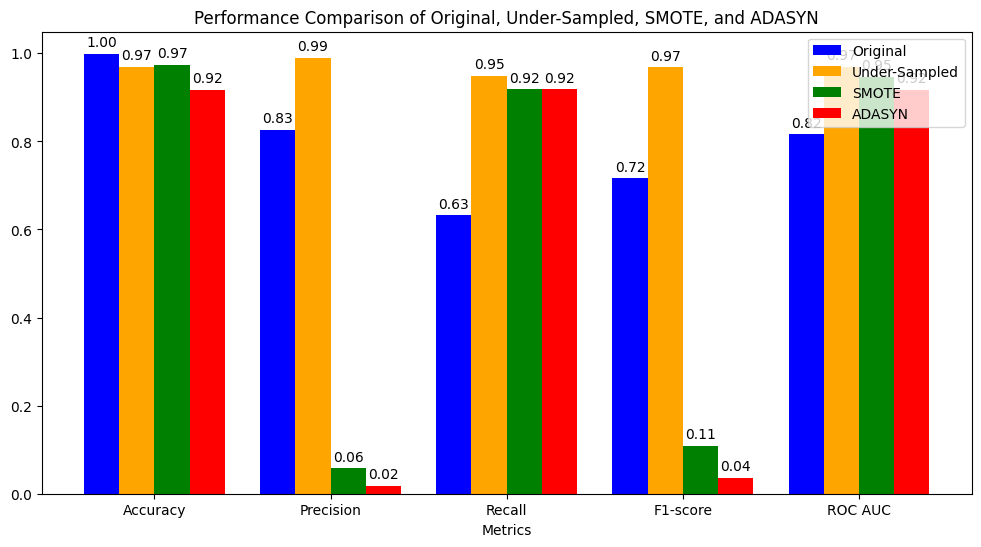

In [ ]:
# Plot Results
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
methods = ['Original', 'Under-Sampled', 'SMOTE', 'ADASYN']
metrics = [metrics_original, metrics_under, metrics_smote, metrics_adasyn]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width*1.5, metrics[0], width, label='Original', color='blue')
rects2 = ax.bar(x - width/2, metrics[1], width, label='Under-Sampled', color='orange')
rects3 = ax.bar(x + width/2, metrics[2], width, label='SMOTE', color='green')
rects4 = ax.bar(x + width*1.5, metrics[3], width, label='ADASYN', color='red')

ax.set_xlabel('Metrics')
ax.set_title('Performance Comparison of Original, Under-Sampled, SMOTE, and ADASYN')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for rects in [rects1, rects2, rects3, rects4]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

In [ ]:


# SHAP Values for Model Interpretability
shap_explainer = shap.LinearExplainer(model, X_train)
shap_values = shap_explainer.shap_values(X_test)

# Create and save SHAP plots
shap.initjs()


# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=credit_card_data.columns[:-1], show=False)
plt.savefig('shap_summary_plot.png')
plt.close()



# Load and display SHAP Summary Plot
summary_plot_img = Image.open('shap_summary_plot.png')
plt.figure(figsize=(16, 11))
plt.imshow(summary_plot_img)
plt.title("SHAP Summary Plot")
plt.axis('off')
plt.show()
print()
print()
print()

# LIME for Model Interpretability
lime_explainer = LimeTabularExplainer(X_train, feature_names=credit_card_data.columns[:-1], class_names=['Not Fraud', 'Fraud'], discretize_continuous=True)
i = 0  # Example index, change to the index you want to explain
exp = lime_explainer.explain_instance(X_test[i], model.predict_proba, num_features=10)

# Display LIME Explanation Plot
plt.figure(figsize=(10, 6))
exp.as_pyplot_figure()
plt.title("LIME Explanation Plot")
plt.show()


<Figure size 1000x600 with 0 Axes>

In [ ]:
# Importing the necessary libraries
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function for threshold tuning and plotting curves
def threshold_tuning(model, X_test, Y_test):
    # Predict probabilities for the positive class (fraudulent)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probability for class '1' (fraudulent)

    # Precision-Recall Curve
    precision, recall, thresholds_pr = precision_recall_curve(Y_test, y_prob)
    pr_auc = auc(recall, precision)

    # ROC Curve
    fpr, tpr, thresholds_roc = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Explore performance at different thresholds
    for threshold in [0.3, 0.5, 0.7]:
        # Apply the threshold to the probabilities
        y_pred_threshold = (y_prob >= threshold).astype(int)

        # Evaluate metrics at this threshold
        accuracy = accuracy_score(Y_test, y_pred_threshold)
        precision = precision_score(Y_test, y_pred_threshold)
        recall = recall_score(Y_test, y_pred_threshold)
        f1 = f1_score(Y_test, y_pred_threshold)
        roc_auc = roc_auc_score(Y_test, y_pred_threshold)

        print(f"Threshold: {threshold}")
        print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC AUC: {roc_auc:.2f}")
        print("-" * 50)

# Apply the function after model training and evaluation
# After fitting your Logistic Regression model on different datasets (Original, Under-Sampled, SMOTE, ADASYN)
# For example, after evaluating on SMOTE data:
print("Threshold Tuning for SMOTE Data:")
threshold_tuning(model, X_test, Y_test)  # Replace X_test and Y_test with the respective dataset for other cases if needed

# Plot Performance Comparison for SMOTE, Under-Sampled, and ADASYN (as before)
# Define the methods and metrics as before and include this in your visualizations to compare


Threshold Tuning for SMOTE Data:


Threshold: 0.3
Accuracy: 0.84, Precision: 0.01, Recall: 0.95, F1-Score: 0.02, ROC AUC: 0.89
--------------------------------------------------
Threshold: 0.5
Accuracy: 0.92, Precision: 0.02, Recall: 0.92, F1-Score: 0.04, ROC AUC: 0.92
--------------------------------------------------
Threshold: 0.7
Accuracy: 0.96, Precision: 0.04, Recall: 0.92, F1-Score: 0.07, ROC AUC: 0.94
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Threshold Tuning for ADASYN Data:


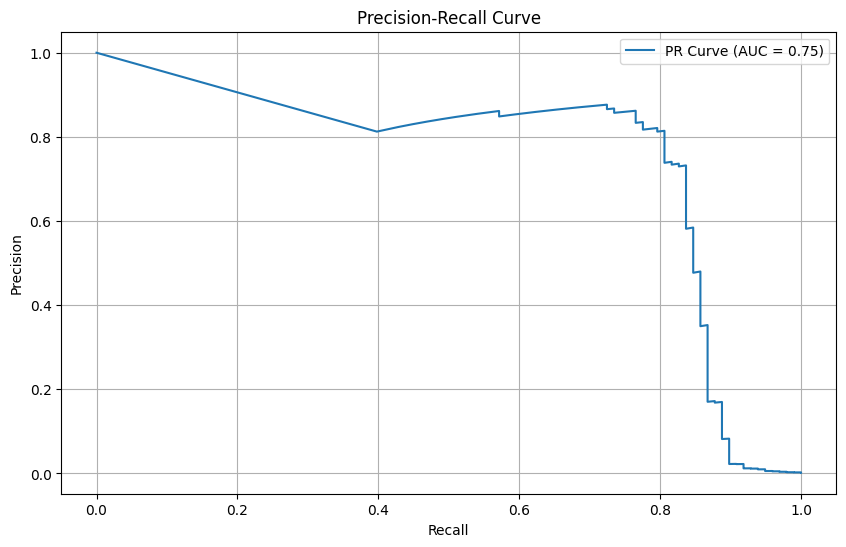

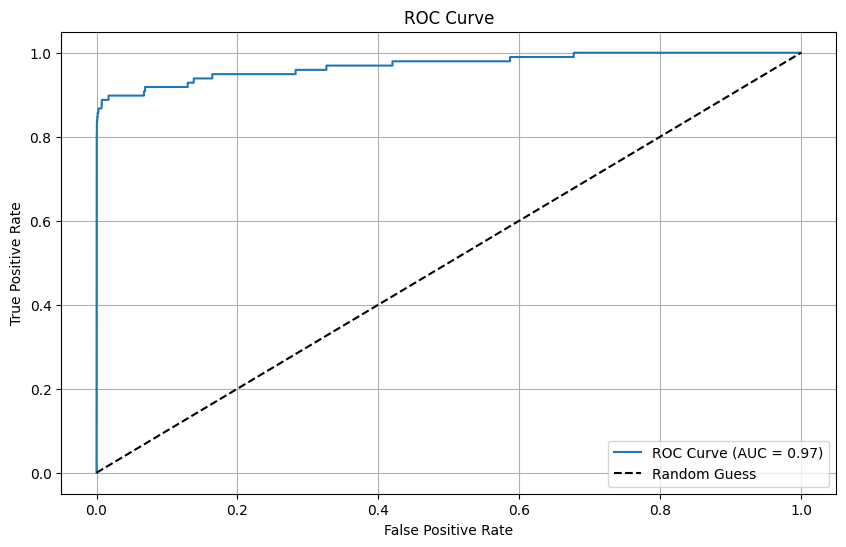

Threshold: 0.3
Accuracy: 0.96, Precision: 0.04, Recall: 0.90, F1-Score: 0.07, ROC AUC: 0.93
--------------------------------------------------
Threshold: 0.5
Accuracy: 0.98, Precision: 0.07, Recall: 0.90, F1-Score: 0.13, ROC AUC: 0.94
--------------------------------------------------
Threshold: 0.7
Accuracy: 0.99, Precision: 0.12, Recall: 0.89, F1-Score: 0.21, ROC AUC: 0.94
--------------------------------------------------


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you already have your dataset (X, Y)
# X = Features (e.g., your dataset features like age, sex, etc.)
# Y = Labels (e.g., 1 for fraudulent, 0 for non-fraudulent)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply ADASYN to balance the dataset
adasyn = ADASYN(sampling_strategy='minority', random_state=42)  # Adjust the sampling_strategy as needed
X_train_adasyn, Y_train_adasyn = adasyn.fit_resample(X_train, Y_train)

# Ensure that the test set has the same number of features as the training set
# If there was any preprocessing applied to the training data, apply the same to the test data
# For example, if you applied feature scaling or transformation to X_train_adasyn, apply it to X_test as well.

# Train Logistic Regression on ADASYN data
model = LogisticRegression(random_state=42)
model.fit(X_train_adasyn, Y_train_adasyn)

# Function for threshold tuning and plotting curves
def threshold_tuning(model, X_test, Y_test):
    # Predict probabilities for the positive class (fraudulent)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probability for class '1' (fraudulent)

    # Precision-Recall Curve
    precision, recall, thresholds_pr = precision_recall_curve(Y_test, y_prob)
    pr_auc = auc(recall, precision)

    # ROC Curve
    fpr, tpr, thresholds_roc = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Explore performance at different thresholds
    for threshold in [0.3, 0.5, 0.7]:
        # Apply the threshold to the probabilities
        y_pred_threshold = (y_prob >= threshold).astype(int)

        # Evaluate metrics at this threshold
        accuracy = accuracy_score(Y_test, y_pred_threshold)
        precision = precision_score(Y_test, y_pred_threshold)
        recall = recall_score(Y_test, y_pred_threshold)
        f1 = f1_score(Y_test, y_pred_threshold)
        roc_auc = roc_auc_score(Y_test, y_pred_threshold)

        print(f"Threshold: {threshold}")
        print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC AUC: {roc_auc:.2f}")
        print("-" * 50)

# Apply the function after model training and evaluation
# For example, after evaluating on ADASYN data:
print("Threshold Tuning for ADASYN Data:")
threshold_tuning(model, X_test, Y_test)  # Use original X_test and Y_test for evaluation

# Plot Performance Comparison for SMOTE, Under-Sampled, and ADASYN (as before)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Threshold Tuning for Original Data:


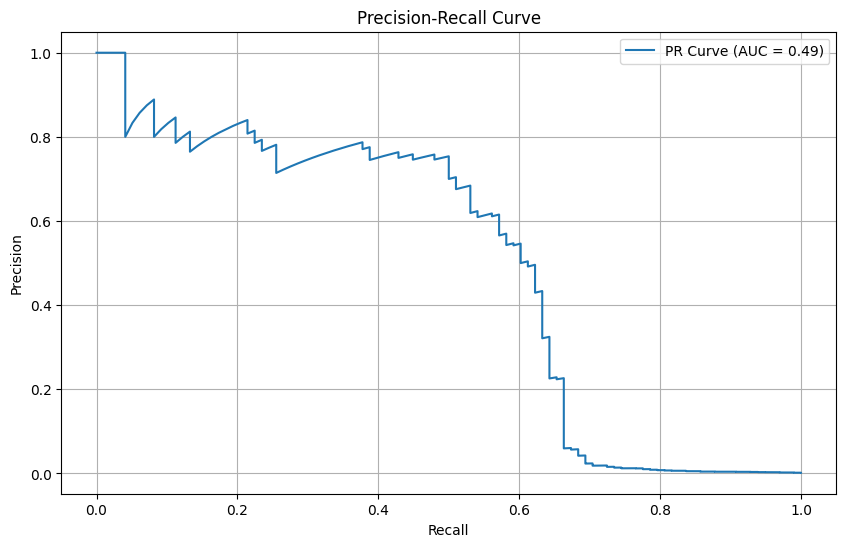

Threshold: 0.3
Accuracy: 1.00, Precision: 0.50, Recall: 0.61, F1-Score: 0.55, ROC AUC: 0.81
--------------------------------------------------
Threshold: 0.5
Accuracy: 1.00, Precision: 0.61, Recall: 0.56, F1-Score: 0.59, ROC AUC: 0.78
--------------------------------------------------
Threshold: 0.7
Accuracy: 1.00, Precision: 0.67, Recall: 0.53, F1-Score: 0.59, ROC AUC: 0.77
--------------------------------------------------


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you already have your dataset (X, Y)
# X = Features (e.g., your dataset features like age, sex, etc.)
# Y = Labels (e.g., 1 for fraudulent, 0 for non-fraudulent)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Logistic Regression on the original data (no oversampling)
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

# Function for threshold tuning and plotting curves
def threshold_tuning(model, X_test, Y_test):
    # Predict probabilities for the positive class (fraudulent)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probability for class '1' (fraudulent)

    # Precision-Recall Curve
    precision, recall, thresholds_pr = precision_recall_curve(Y_test, y_prob)
    pr_auc = auc(recall, precision)

    # ROC Curve
    fpr, tpr, thresholds_roc = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Explore performance at different thresholds
    for threshold in [0.3, 0.5, 0.7]:
        # Apply the threshold to the probabilities
        y_pred_threshold = (y_prob >= threshold).astype(int)

        # Evaluate metrics at this threshold
        accuracy = accuracy_score(Y_test, y_pred_threshold)
        precision = precision_score(Y_test, y_pred_threshold)
        recall = recall_score(Y_test, y_pred_threshold)
        f1 = f1_score(Y_test, y_pred_threshold)
        roc_auc = roc_auc_score(Y_test, y_pred_threshold)

        print(f"Threshold: {threshold}")
        print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC AUC: {roc_auc:.2f}")
        print("-" * 50)

# Apply the function after model training and evaluation
print("Threshold Tuning for Original Data:")
threshold_tuning(model, X_test, Y_test)  # Use original X_test and Y_test for evaluation
